In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
plt.style.use('seaborn-deep')
plt.style.use("seaborn-darkgrid")

In [23]:
df = pd.read_csv('../data/train_data_cleaned_full_1.csv')
#split categorical and numerical variables
col_num = df.select_dtypes(include = np.number).columns
col_cat = df.select_dtypes(include = 'object').columns
print(col_num)
print(col_cat)
print(df.shape)
df.sample(5)

Index(['weight', 'depth_percent', 'table_percent', 'price', 'volume'], dtype='object')
Index(['quality', 'color', 'clarity'], dtype='object')
(40438, 8)


,weight,quality,color,clarity,depth_percent,table_percent,price,volume
15486,0.31,Very Good,I,VS2,0.607,0.61,6.075,49.309344
26066,0.32,Ideal,F,VVS1,0.604,0.57,6.750,52.161921
25148,1.52,Ideal,H,SI1,0.614,0.55,9.234,251.722944
34335,0.70,Fair,E,SI1,0.652,0.58,7.748,111.705236
10983,1.00,Very Good,I,VS2,0.619,0.59,8.521,159.621220


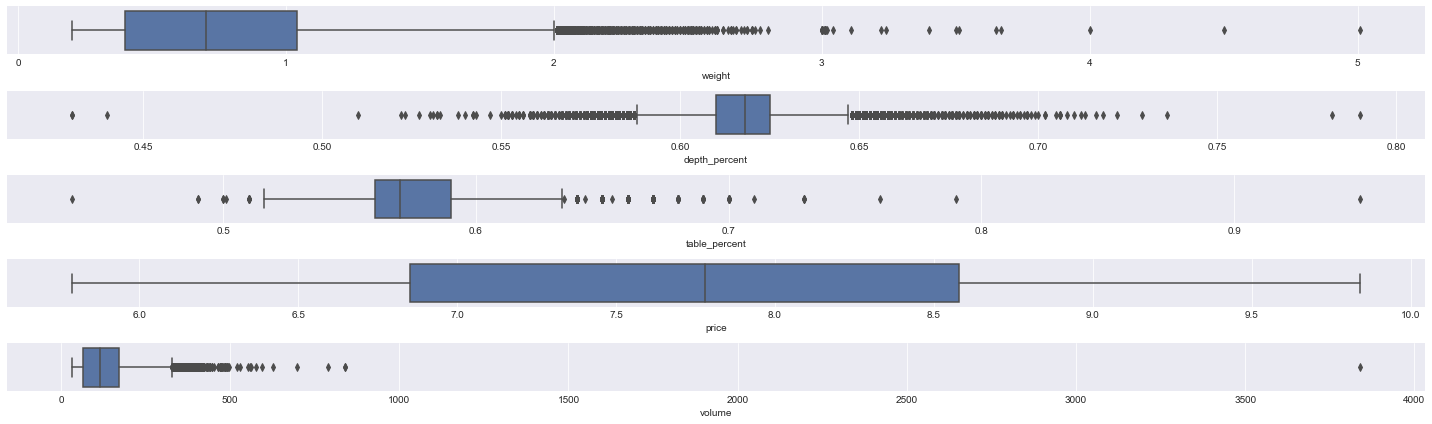

In [24]:
#plot outliers
fig, axes = plt.subplots(5, 1, figsize=(20,6))

for i in range(len(col_num)):
    sns.boxplot(x=df[col_num].columns[i], data=df[col_num], ax=axes[i])
    plt.tight_layout()
plt.show();

In [25]:
#get outliers
def find_outliers(columns, dataframe): 
    dicc_indexes = {}
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0:
            dicc_indexes[col] = (list(outliers_data.index))    
    return dicc_indexes

outliers = find_outliers(col_num, df)
outliers_list = []
for k, v in outliers.items():
    print('Column: ', k, '\n', 'Outliers: ', len(v))
    for i in v:
        outliers_list.append(i)
outliers_list = set(outliers_list)
outliers_list = list(outliers_list)
print('total outliers found:', len(outliers_list))
df.drop(outliers_list, axis=0, inplace=True)
df.shape

Column:  weight 
 Outliers:  1444
Column:  depth_percent 
 Outliers:  1906
Column:  table_percent 
 Outliers:  449
Column:  volume 
 Outliers:  1008
total outliers found: 3494


(36944, 8)

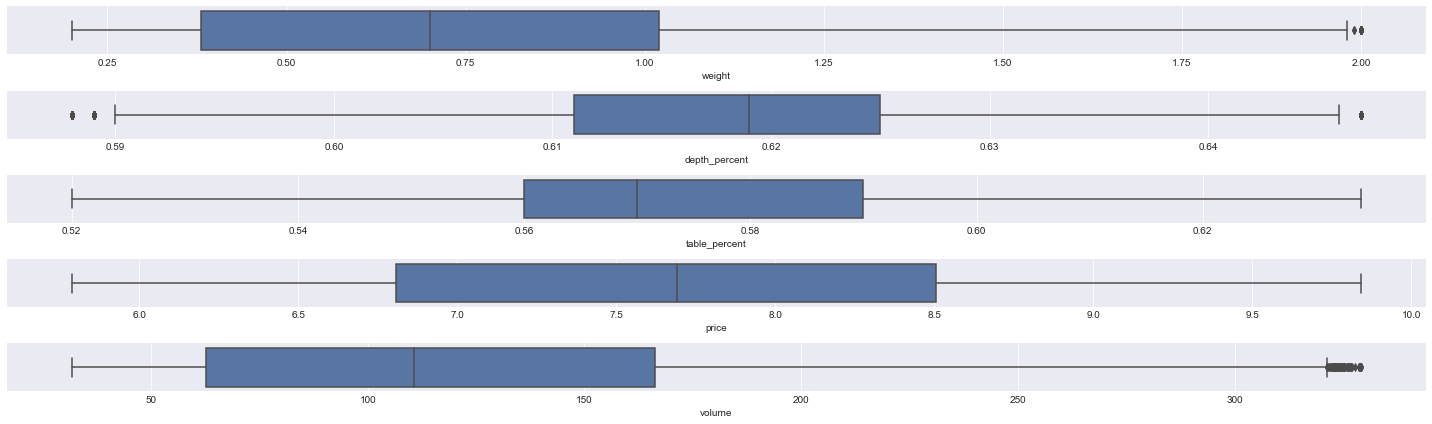

In [26]:
#plot outliers
fig, axes = plt.subplots(5, 1, figsize=(20,6))

for i in range(len(col_num)):
    sns.boxplot(x=df[col_num].columns[i], data=df[col_num], ax=axes[i])
    plt.tight_layout()
plt.show();

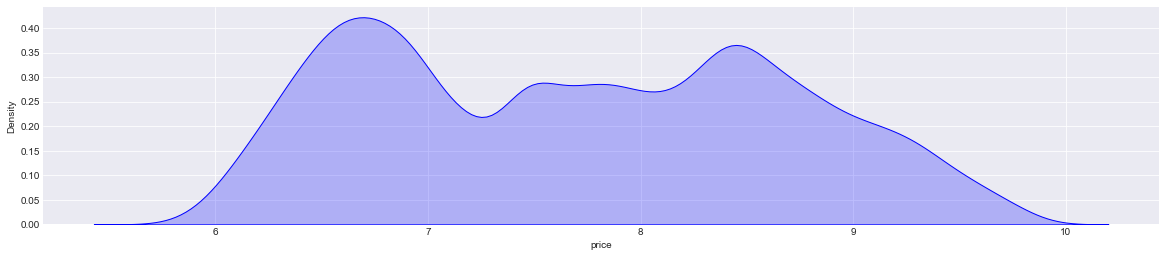

In [27]:
#plot response variable distribution
fig, axes = plt.subplots(figsize = (20, 4))
sns.distplot(df.price, hist = False, color = "blue", kde_kws = {"shade": True, "linewidth": 1});

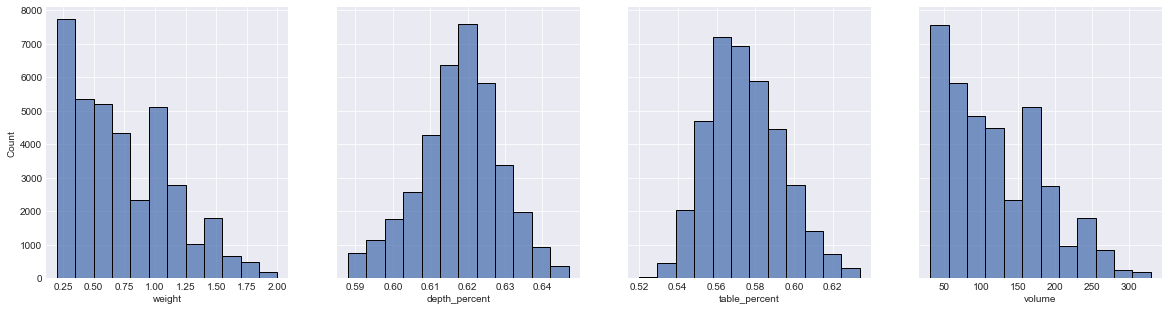

In [28]:
#plot numerical variables distribution
fig, ax = plt.subplots(1, 4, figsize = (20,5), sharey=True)
ax = ax.flat
df_num = df[col_num.drop('price')]
counter = 0
for i in df_num.columns:
    sns.histplot(df_num[i], kde = False, ax = ax[counter], bins=12)
    counter += 1
plt.show();

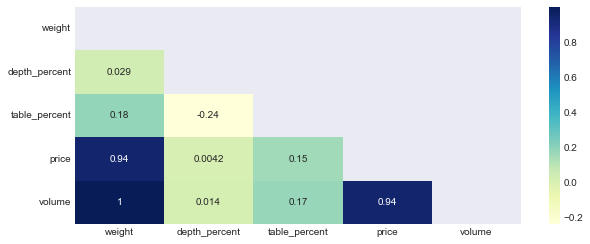

In [29]:
#headmap corr plot
fig, axes = plt.subplots(figsize = (10, 4))
mask = np.triu(np.ones_like(df[col_num].corr(), dtype = np.bool))
sns.heatmap(df[col_num].corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

price vs depth_percent have no correlation


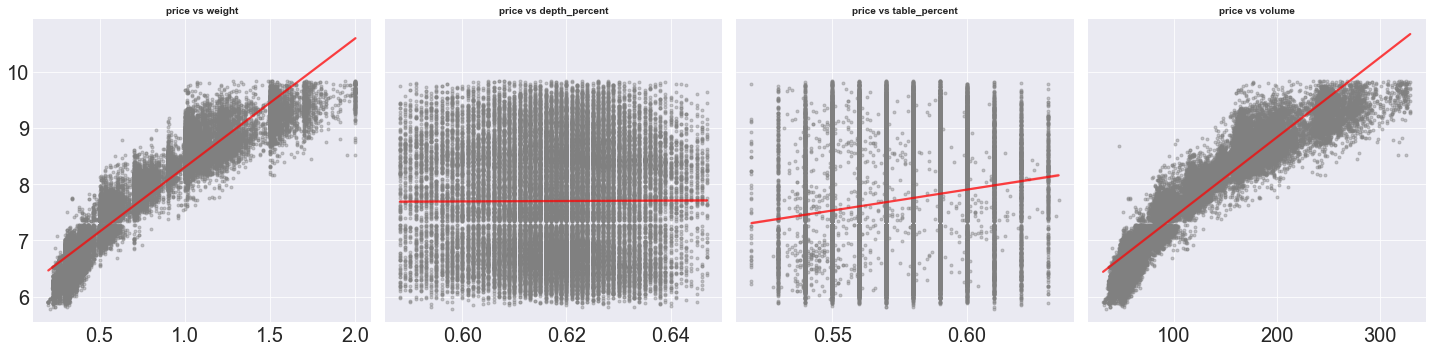

In [30]:
#plotteamos correlaciones entre variables predictoras y respuesta
fig, axes = plt.subplots(1, 4, figsize = (20,5), sharey=True)
axes = axes.flat
for i, colum in enumerate(df_num.columns):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"price vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();
print('price vs depth_percent have no correlation')

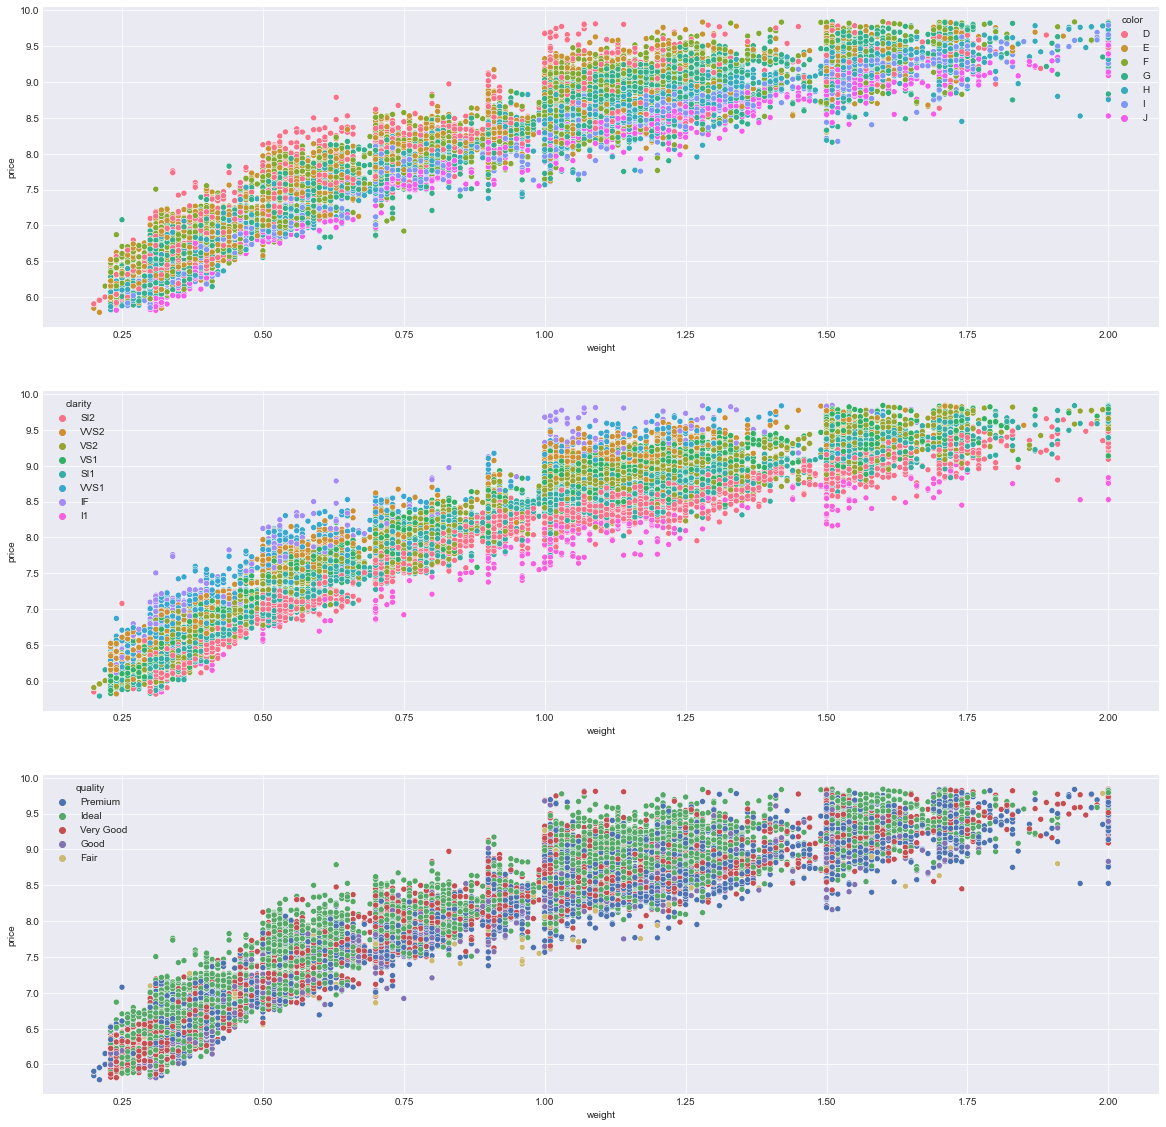

In [32]:
mapping = {'quality':['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
            'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            'clarity':['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
fig, axes = plt.subplots(3, 1, figsize = (20,20), sharey=True)
sns.scatterplot(data = df, y = df['price'], x = df['weight'], hue = "color", ax = axes[0])
sns.scatterplot(data = df, y = df['price'], x = df['weight'], hue = "clarity", ax = axes[1])
sns.scatterplot(data = df, y = df['price'], x = df['weight'], hue = "quality", ax = axes[2]);

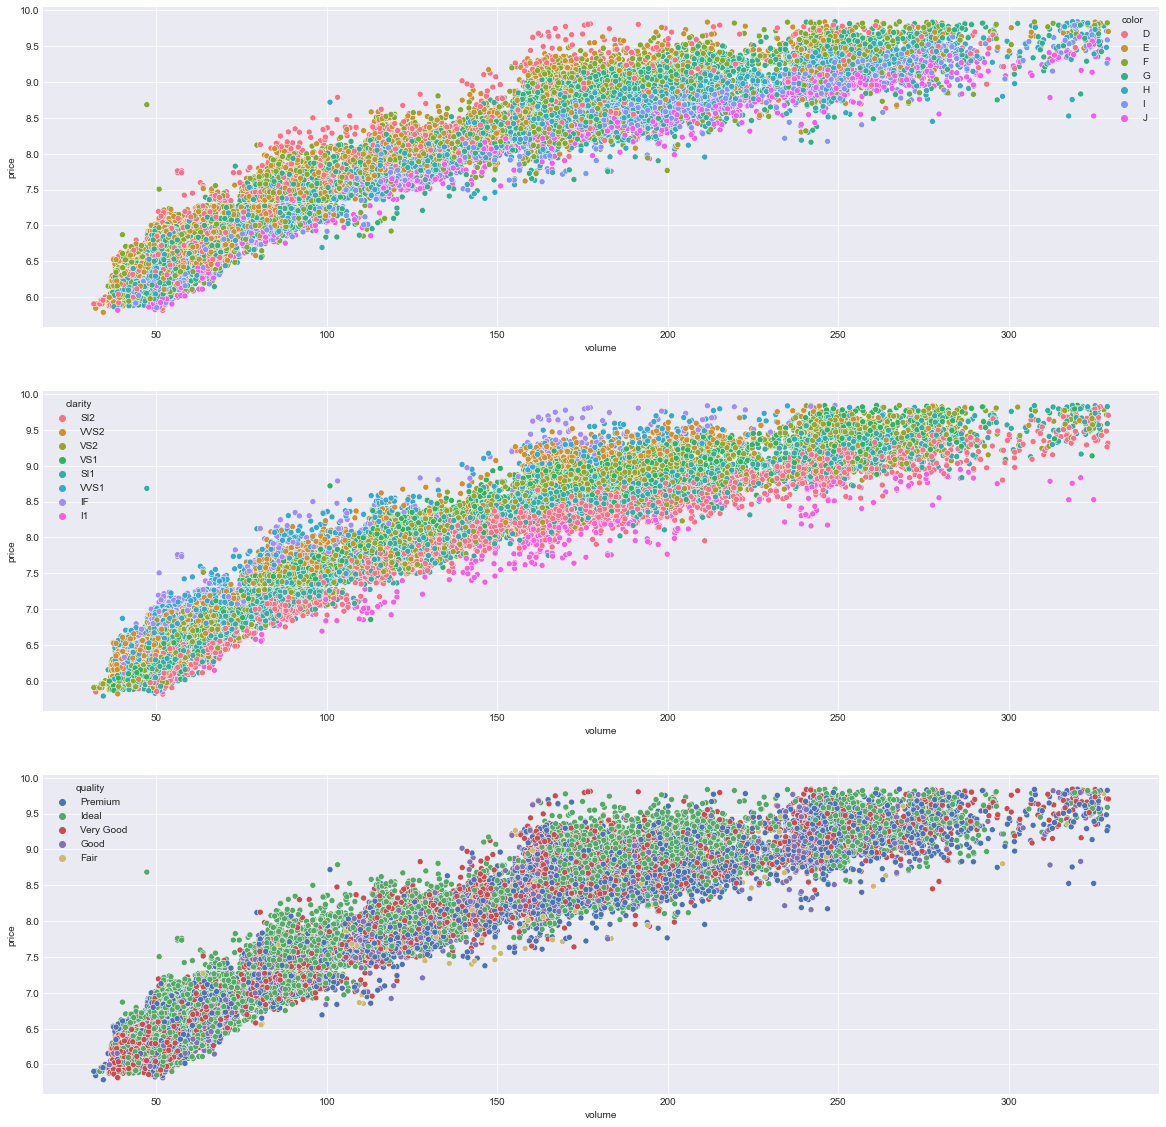

In [33]:
mapping = {'quality':['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
            'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            'clarity':['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
fig, axes = plt.subplots(3, 1, figsize = (20,20), sharey=True)
sns.scatterplot(data = df, y = df['price'], x = df['volume'], hue = "color", ax = axes[0])
sns.scatterplot(data = df, y = df['price'], x = df['volume'], hue = "clarity", ax = axes[1])
sns.scatterplot(data = df, y = df['price'], x = df['volume'], hue = "quality", ax = axes[2]);

In [34]:
#export to csv
df.to_csv('../data/train_data_wo_outliers_full_1.csv', index=False)